# NETFLIX ANALYSIS

#### This Netflix analysis is my first attempt and it materialised out of the aim and effort to take the first step as a Python developer.

In [3]:
import streamlit as st
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#load dataset
df = pd.read_csv("C:\\Users\\User\\Documents\\Projects\\Netflix_Analysis\\netflix_titles.csv")

#Display first 5 rows
df.head()

show_id     type                  title         director  \
0      s1    Movie   Dick Johnson Is Dead  Kirsten Johnson   
1      s2  TV Show          Blood & Water              NaN   
2      s3  TV Show              Ganglands  Julien Leclercq   
3      s4  TV Show  Jailbirds New Orleans              NaN   
4      s5  TV Show           Kota Factory              NaN   

                                                cast        country  \
0                                                NaN  United States   
1  Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...   South Africa   
2  Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...            NaN   
3                                                NaN            NaN   
4  Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...          India   

           date_added  release_year rating   duration  \
0  September 25, 2021          2020  PG-13     90 min   
1  September 24, 2021          2021  TV-MA  2 Seasons   
2  September 24, 2021          2021  TV-MA   1 Season   
3  September 24, 2021          2021  TV-MA   1 Season   
4  September 24, 2021          2021  TV-MA  2 Seasons   

                                           listed_in  \
0                                      Documentaries   
1    International TV Shows, TV Dramas, TV Mysteries   
2  Crime TV Shows, International TV Shows, TV Act...   
3                             Docuseries, Reality TV   
4  International TV Shows, Romantic TV Shows, TV ...   

                                         description  
0  As her father nears the end of his life, filmm...  
1  After crossing paths at a party, a Cape Town t...  
2  To protect his family from a powerful drug lor...  
3  Feuds, flirtations and toilet talk go down amo...  
4  In a city of coaching centers known to train I...

##### The labels and the first four records have been displayed. The next step is to have information about the dataset. 

In [4]:
#check dataset information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


##### The information about the dataset is revealed and it is clear that the missing values for non-null counted are not the same. We need to discover the missing values count.

In [5]:
#Count missing values
df.isnull().sum()

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

##### The result reveals that the missing values for director, cast and country are too high and critical. This will skew our analysis. We will remove them.

In [7]:
#drop rows with missing crirical data
df.dropna(subset=["country", "cast", "director"], inplace=True)

#Replace missing ratings
df.fillna({"rating": "Not Rated"}, inplace=True)

##### Having removed the critical column, we still need to make a provision for missing values under the "rating" label, we used "Not rated".

#### We can now move on with our analysis.

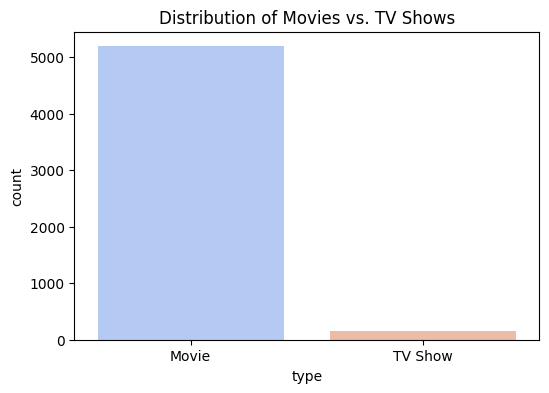

In [16]:
plt.figure(figsize=(6, 4))
sns.countplot(x="type", data=df, hue="type", palette="coolwarm", legend=False)
plt.title("Distribution of Movies vs. TV Shows")
plt.show()

# Insight: Discover whether Netflix has more movies or TV shows.

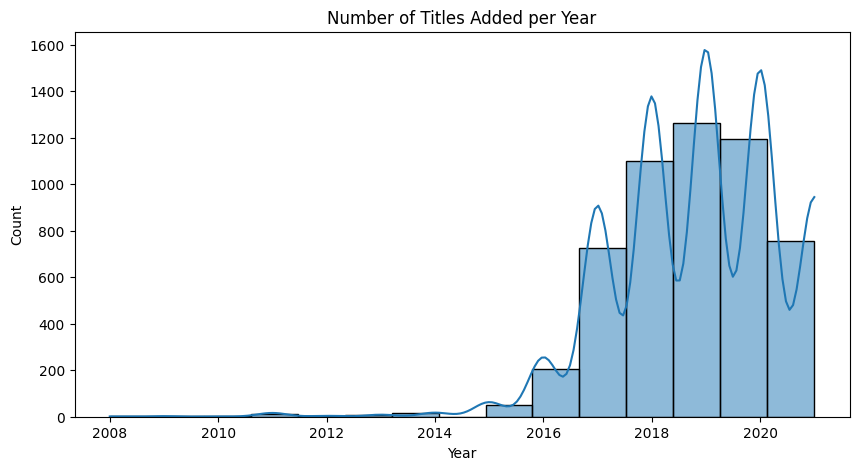

In [19]:
df["date_added"] = pd.to_datetime(df["date_added"], format='mixed', errors='coerce')
df["year_added"] = df["date_added"].dt.year

plt.figure(figsize=(10, 5))
sns.histplot(df["year_added"].dropna(), bins=15, kde=True)
plt.title("Number of Titles Added per Year")
plt.xlabel("Year")
plt.ylabel("Count")
plt.show()

# Insight: to know if Netflix has been adding more content over time.

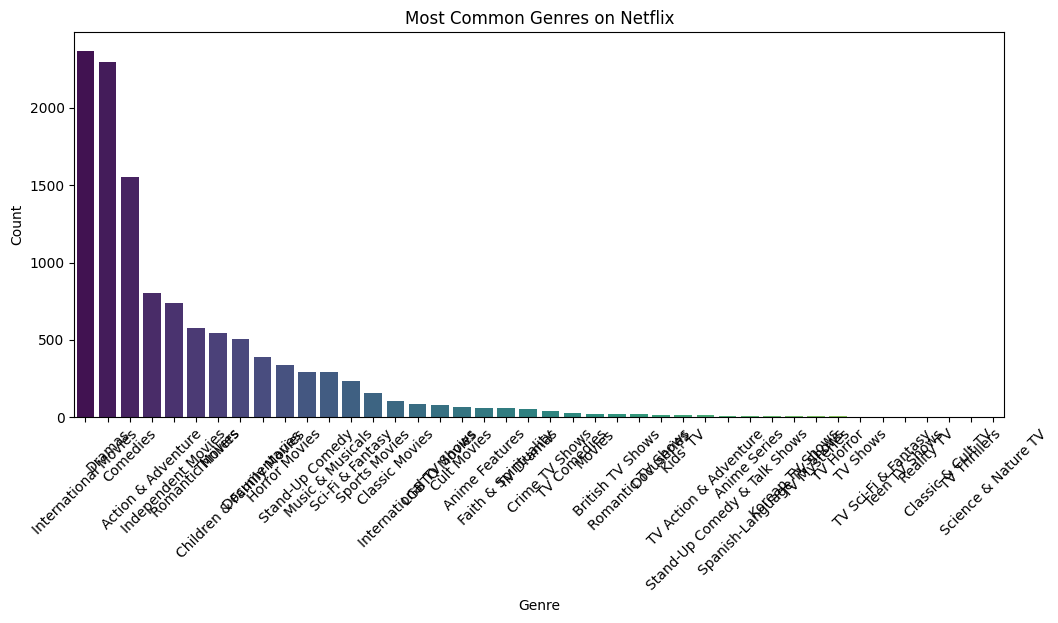

In [25]:
from collections import Counter

# Split genres and count occurrences
genre_list = ", ".join(df["listed_in"].dropna()).split(", ")
genre_counts = Counter(genre_list)

# Convert to DataFrame for visualization
genre_df = pd.DataFrame(genre_counts.items(), columns=["Genre", "Count"])
genre_df = genre_df.sort_values(by="Count", ascending=False)

plt.figure(figsize=(12, 5))
sns.barplot(x=genre_df["Genre"], y=genre_df["Count"], hue=genre_df["Genre"], palette="viridis", legend=False)
plt.xticks(rotation=45)
plt.title("Most Common Genres on Netflix")
plt.show()

# Insight: Find the most popular genres on Netflix.

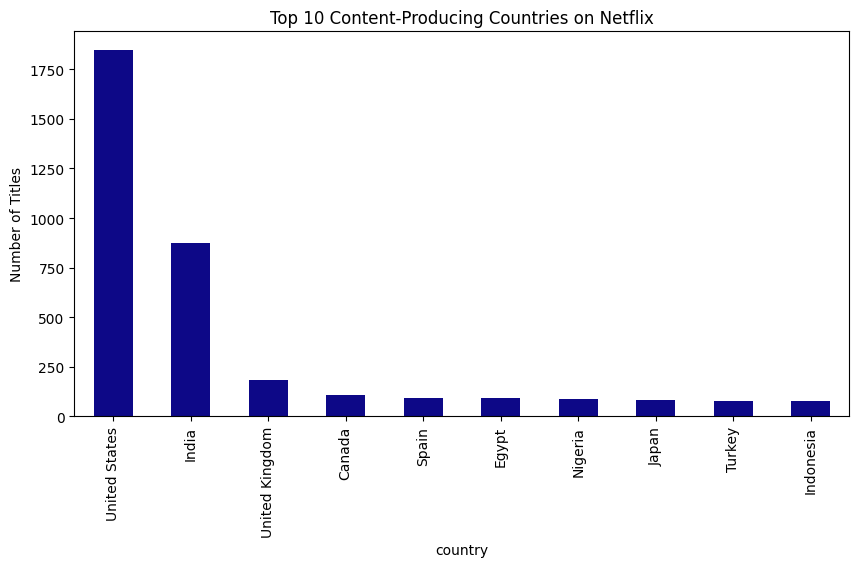

In [26]:
plt.figure(figsize=(10, 5))
df["country"].value_counts().head(10).plot(kind="bar", colormap="plasma")
plt.title("Top 10 Content-Producing Countries on Netflix")
plt.ylabel("Number of Titles")
plt.show()

# Insight: Discover which countries contribute the most.

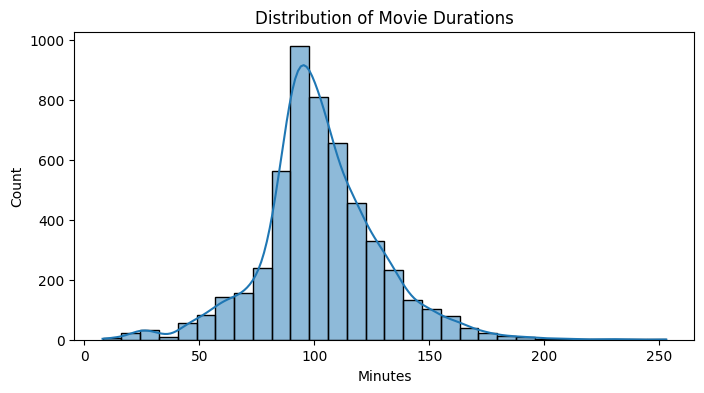

In [29]:
# Convert duration only for Movies
df.loc[df["type"] == "Movie", "duration"] = (
    df.loc[df["type"] == "Movie", "duration"]
    .str.replace(" min", "", regex=False)  # Remove ' min'
    .astype(float)  # Convert to float
)

# Plot only Movie durations
plt.figure(figsize=(8, 4))
sns.histplot(df[df["type"] == "Movie"]["duration"].dropna(), bins=30, kde=True)
plt.title("Distribution of Movie Durations")
plt.xlabel("Minutes")
plt.show()

# Insight: Identify the average length of Netflix movies

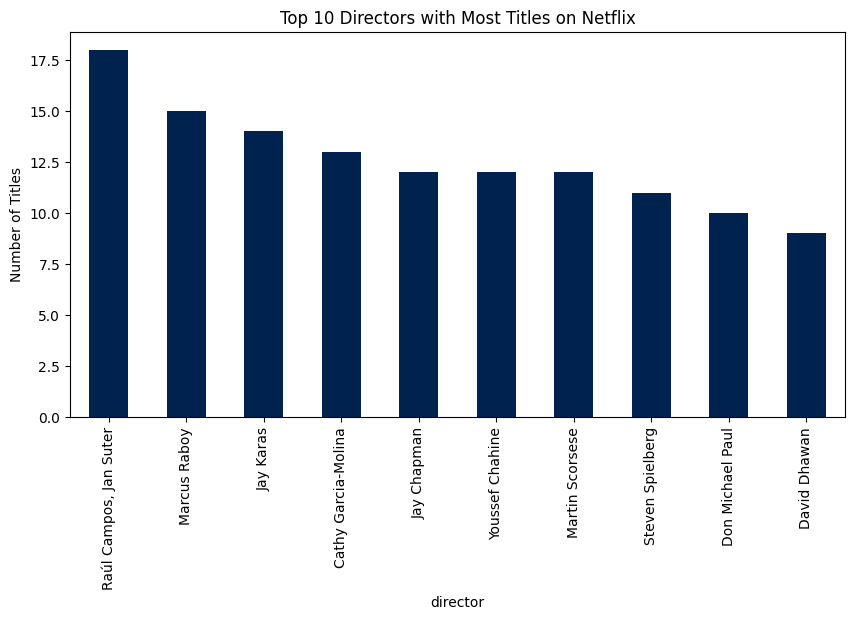

In [30]:
plt.figure(figsize=(10, 5))
df["director"].value_counts().head(10).plot(kind="bar", colormap="cividis")
plt.title("Top 10 Directors with Most Titles on Netflix")
plt.ylabel("Number of Titles")
plt.show()

# Insight: Identify the most prolific Netflix directors

##### We assume that the above visuals are self explanatory. Therefore, there is no need for any extraordinary explanation.

In [33]:
df.to_csv("cleaned_netflix_data.csv", index=False)

In [ ]:

# Load Data
df = pd.read_csv("netflix_titles.csv")
df["date_added"] = pd.to_datetime(df["date_added"], format='mixed', errors='coerce')
df["year_added"] = df["date_added"].dt.year

# App Title
st.title("ðŸ“Š Netflix Data Analysis Dashboard")

# Sidebar Filters
st.sidebar.header("Filter Data")
content_type = st.sidebar.radio("Select Type", ["All", "Movie", "TV Show"])
year_range = st.sidebar.slider("Select Year Range", int(df["year_added"].min()), int(df["year_added"].max()), (2010, 2021))

# Apply Filters
filtered_df = df[(df["year_added"] >= year_range[0]) & (df["year_added"] <= year_range[1])]
if content_type != "All":
    filtered_df = filtered_df[filtered_df["type"] == content_type]

# Visualization: Movies vs. TV Shows
st.subheader("Movies vs. TV Shows")
fig, ax = plt.subplots()
sns.countplot(x="type", data=df, hue="type", palette="coolwarm", ax=ax)
st.pyplot(fig)

# Visualization: Yearly Growth
st.subheader("Number of Titles Added Over Time")
fig, ax = plt.subplots()
sns.histplot(df["year_added"].dropna(), bins=15, kde=True, ax=ax)
plt.xlabel("Year")
plt.ylabel("Count")
st.pyplot(fig)

# Show Data Table
st.subheader("Filtered Netflix Data")
st.write(filtered_df)

# Run the App: streamlit run app.py